# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
base = "http://api.openweathermap.org/data/2.5/weather?" 
units = "metric"

# Build partial query URL

url = f'{base}appid={weather_api_key}&units={units}&q='
response = requests.get(url + city)
weather = response.json()
print(json.dumps(weather, indent =4))

{
    "coord": {
        "lon": -68.3,
        "lat": -54.8
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 14,
        "feels_like": 12.25,
        "temp_min": 14,
        "temp_max": 14,
        "pressure": 994,
        "humidity": 77
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.57,
        "deg": 180
    },
    "clouds": {
        "all": 75
    },
    "dt": 1613052335,
    "sys": {
        "type": 1,
        "id": 8303,
        "country": "AR",
        "sunrise": 1613035144,
        "sunset": 1613088959
    },
    "timezone": -10800,
    "id": 3833367,
    "name": "Ushuaia",
    "cod": 200
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a City dataframe
citydf = pd.DataFrame({'City': cities})
citydf

,City
0,arraial do cabo
1,lorengau
2,jamestown
3,ternate
4,bengkulu
...,...
622,olean
623,port blair
624,madang
625,buraydah


In [7]:
#citydf["Country"] = ""
#citydf["Latitude"] = ""
#citydf["Longitude"] = ""
#citydf["Temperature (F)"] = ""
#citydf["Humidity"] = ""
#citydf["Cloudiness"] = ""
#citydf["Wind Speed (mph)"] = ""
place =[]
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness=[]
wind_speed= []
city_data = []


In [8]:
# Save config information.
base = "http://api.openweathermap.org/data/2.5/weather?" 
units = "metric"
ncity = 1

city_data = []

for city in cities:
    url = f'{base}appid={weather_api_key}&units={units}&q='
    
    try:
        response = requests.get(url + city).json()
        country = response["sys"]["country"]
        latitude= response["coord"]["lat"]
        longitude =response["coord"]["lon"]
        temperature = response["main"]["temp"]
        humidity =response["main"]["humidity"]
        cloudiness= response["clouds"]["all"]
        wind_speed=response["wind"]["speed"]
        city_data.append({"City":city, "Country": country, 'Latitude':latitude, 
                          "Longitude": longitude, "Temperature": temperature, "Humidity": humidity,
                         "Cloudiness": cloudiness, "Windspeed": wind_speed})
        
        print(f" City number:{ncity} {city}")
        
        ncity +=1
    
    except:
        print("Country not found")




 City number:1 arraial do cabo
 City number:2 lorengau
 City number:3 jamestown
 City number:4 ternate
 City number:5 bengkulu
Country not found
 City number:6 kodiak
 City number:7 makokou
 City number:8 guayaramerin
 City number:9 bluff
 City number:10 ushuaia
 City number:11 plettenberg bay
 City number:12 kapaa
 City number:13 port-gentil
 City number:14 tuatapere
 City number:15 vostok
 City number:16 atuona
 City number:17 ahipara
 City number:18 lillooet
 City number:19 rio gallegos
 City number:20 gushikawa
 City number:21 petropavl
 City number:22 sibu
 City number:23 rawson
 City number:24 castro
 City number:25 sechura
 City number:26 vestmannaeyjar
Country not found
 City number:27 new norfolk
 City number:28 punta arenas
 City number:29 qaanaaq
 City number:30 baruun-urt
 City number:31 east london
 City number:32 ugoofaaru
 City number:33 rikitea
 City number:34 butaritari
 City number:35 georgetown
 City number:36 hobart
 City number:37 guanica
 City number:38 taoudenni


In [9]:
weatherdf =pd.DataFrame(city_data)
weatherdf["Temperature"] = round(1.8 * weatherdf['Temperature'] + 32,2)
weatherdf

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,arraial do cabo,BR,-22.9661,-42.0278,84.20,70,0,5.66
1,lorengau,PG,-2.0226,147.2712,80.89,81,100,5.50
2,jamestown,US,42.0970,-79.2353,16.38,79,1,3.60
3,ternate,ID,0.8000,127.4000,82.17,80,68,1.97
4,bengkulu,ID,-3.8004,102.2655,78.98,83,99,1.02
...,...,...,...,...,...,...,...,...
569,olean,US,42.0776,-78.4297,15.89,92,90,1.54
570,port blair,IN,11.6667,92.7500,77.88,66,0,3.98
571,madang,PG,-5.2246,145.7966,77.04,88,100,1.94
572,buraydah,SA,26.3260,43.9750,75.20,38,0,1.03


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#no cities over 100% humidity
overhum = weatherdf[weatherdf["Humidity"]>100]
overhum

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed


In [11]:
#  Get the indices of cities that have humidity over 100%.
#N/A

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
#N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

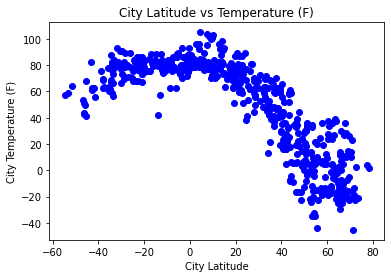

In [14]:
#scatterplot Temp vs Latitude

plt.scatter(weatherdf["Latitude"], weatherdf["Temperature"], facecolors = 'blue', marker = 'o')

plt.title("City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.show()
#Observation: The closer the city is to the equator, the higher the temperature. 
#Also, the northern hemisphere cities are getting colder than the southern hemispherer cities.
#Factors to consider:  Winter vs Summer in the hemispheres.

## Latitude vs. Humidity Plot

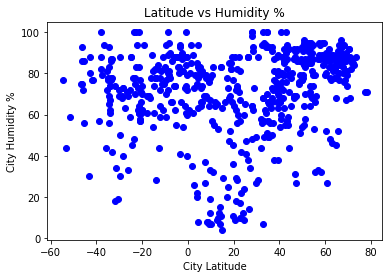

In [15]:
plt.scatter(weatherdf["Latitude"], weatherdf["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Humidity %")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity %")

plt.show()
#Observation: The cities closest to the equator does not necessarily mean the humidity percentage is higher.  
#If fact, some cities closer to the equator are less humidity right now than other cities. 
#Factors to consider:  Winter vs Summer in the hemispheres.

## Latitude vs. Cloudiness Plot

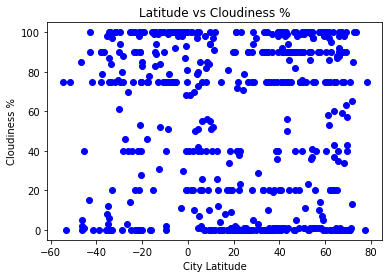

In [16]:
plt.scatter(weatherdf["Latitude"], weatherdf["Cloudiness"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness %")

plt.show()
#Observations: Cities tend to have more 0% cloudiness or 100% than anything in between no matter the city's latitude.

## Latitude vs. Wind Speed Plot

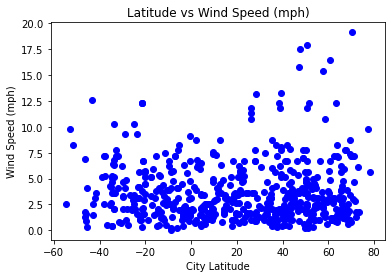

In [17]:
plt.scatter(weatherdf["Latitude"], weatherdf["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()
#Observations: The city's latitude does not have a high correlation with the wind speed in that city. Most city's wind blows at about 5mph or lower each day.

## Linear Regression

In [18]:
#dataframe for just North Hemisphere
northtemp = weatherdf[weatherdf["Latitude"]>0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = -1.6x +99.76


LinregressResult(slope=-1.5972131871754456, intercept=99.7562362041954, rvalue=-0.8819830627701872, pvalue=4.0105555604330505e-131, stderr=0.04294218309657472)

The r value is: 0.77789412301348


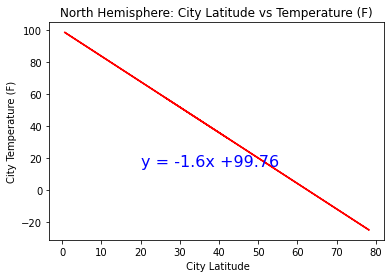

In [20]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel(' City Latitude')
plt.ylabel('City Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

#Answer : This is modeling the temperature changing at -1.47 Farhenheit for each degree in latitude it is away from the hottest city (closest to equator) in the Northern hemisphere.

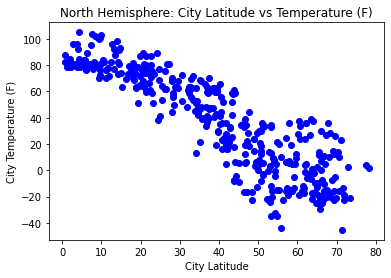

In [21]:
plt.scatter(x_values, y_values, facecolors = 'blue', marker = 'o')
plt.title("North Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.show()
#Observations: The further away from the equator, the colder the temperature. (drops in a linear way) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
#define souhern hemisphere dataframe
southtemp = weatherdf[weatherdf["Latitude"]<0]
southtemp 

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,arraial do cabo,BR,-22.9661,-42.0278,84.20,70,0,5.66
1,lorengau,PG,-2.0226,147.2712,80.89,81,100,5.50
4,bengkulu,ID,-3.8004,102.2655,78.98,83,99,1.02
7,guayaramerin,BO,-10.8368,-65.3614,75.20,88,75,0.51
8,bluff,NZ,-46.6000,168.3333,53.24,75,85,6.88
...,...,...,...,...,...,...,...,...
561,port keats,AU,-14.2500,129.5500,82.09,82,83,4.12
563,juan lacaze,UY,-34.4342,-57.4381,77.00,69,75,3.60
566,santa maria,BR,-29.6842,-53.8069,73.40,88,75,2.06
571,madang,PG,-5.2246,145.7966,77.04,88,100,1.94


In [23]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.4x +84.48


LinregressResult(slope=0.3975328868484749, intercept=84.47680514989088, rvalue=0.5302482122399731, pvalue=3.1945584350751406e-14, stderr=0.048049623210666255)

The r value is: 0.28116316658368756


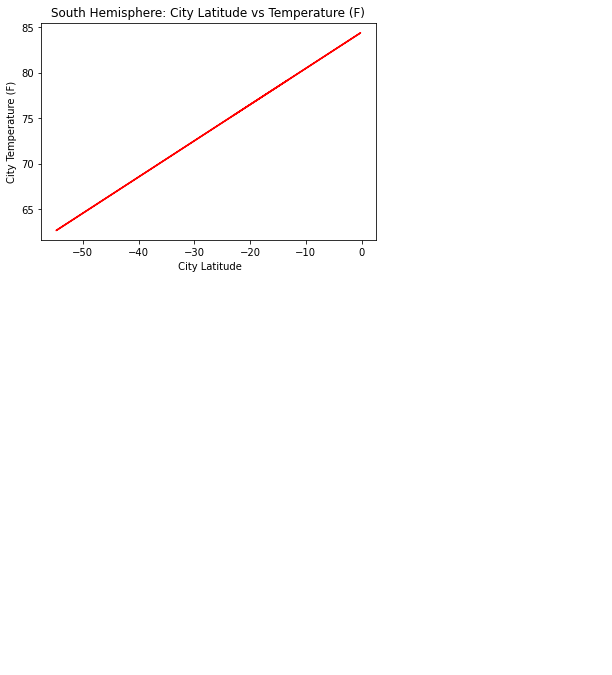

In [24]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel(' City Latitude')
plt.ylabel('City Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: This is modeling the temperature changing at 0.37 degrees Farhenheit for each degree in latitude it is away from the coldest city in the Southern Hemisphere.

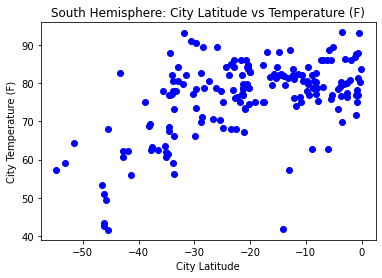

In [25]:
#scatterplot southern hemisphere latitude vs temperature
plt.scatter(southtemp["Latitude"], southtemp["Temperature"], facecolors = 'blue', marker = 'o')
plt.title("South Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.show()
#Observations: The cities in the souther hemisphere show an decrease in temperature as they get further from the equator.
#The correlation isn't as strong as the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.48x +51.21


LinregressResult(slope=0.4849425235672054, intercept=51.21356447035113, rvalue=0.42884231759165414, pvalue=3.4281287563471943e-19, stderr=0.05140013377658423)

The r value is: 0.18390573335738117


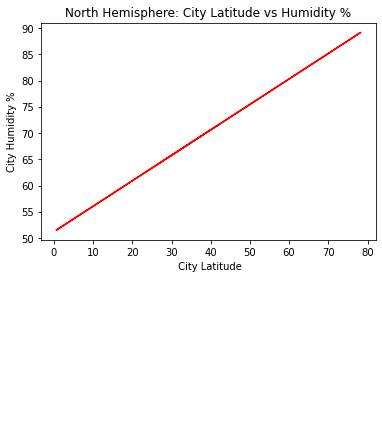

In [27]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Humidity %")
plt.xlabel(' City Latitude')
plt.ylabel('City Humidity %')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The increase in city humidity is 0.39% for each latitude degree it is away from the hottest city in the Northern Hemisphere.

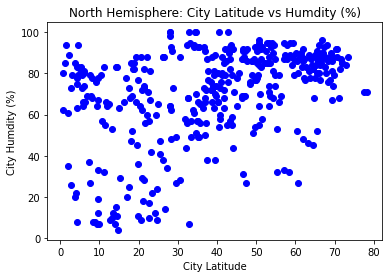

In [28]:
plt.scatter(northtemp["Latitude"], northtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Humdity (%)")
plt.xlabel("City Latitude")
plt.ylabel("City Humdity (%)")

plt.show()
#Observations: The further away from the equator, the clolder the temperature. (drops in a linear way)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [29]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.17x +75.47


LinregressResult(slope=0.1690928576835424, intercept=75.47434471743694, rvalue=0.14205113027533603, pvalue=0.0592878324907544, stderr=0.08907073231606324)

The r value is: 0.020178523612500488


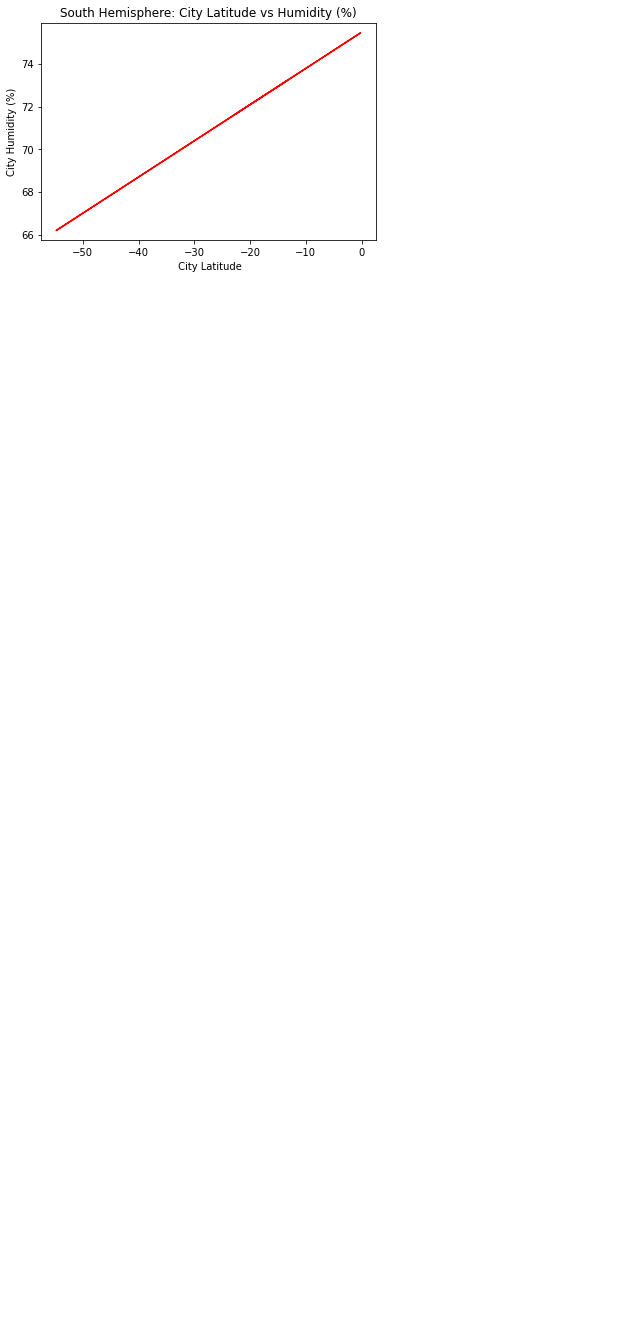

In [30]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Humidity (%)")
plt.xlabel(' City Latitude')
plt.ylabel('City Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The city humidity increases by 0.38% for each latitude degree it is away from the coldest city in the Southern Hemisphere.

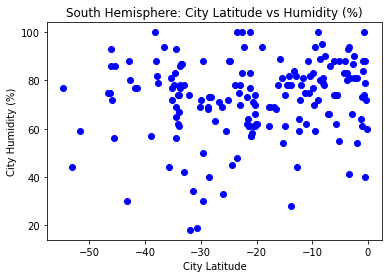

In [31]:
plt.scatter(southtemp["Latitude"], southtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity (%)")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [32]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.32x +37.63


LinregressResult(slope=0.32358771819903803, intercept=37.62547465944674, rvalue=0.1624659043922383, pvalue=0.0011601063656848517, stderr=0.09888322203602075)

The r value is: 0.026395170089987912


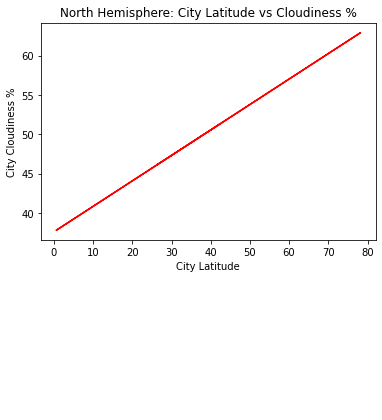

In [33]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness %')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The cloudiness changes by 0.24% for every latitude degree it is away from the equator

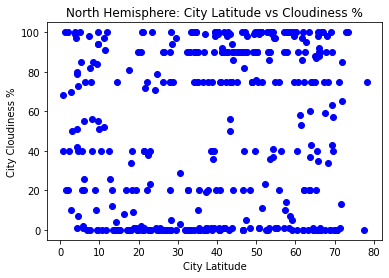

In [34]:
plt.scatter(northtemp["Latitude"], northtemp["Cloudiness"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness %")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [35]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.94x +84.78


LinregressResult(slope=0.9407650806321584, intercept=84.77691178546465, rvalue=0.3381179593739846, pvalue=4.168708088177547e-06, stderr=0.1979390236142613)

The r value is: 0.1143237544512275


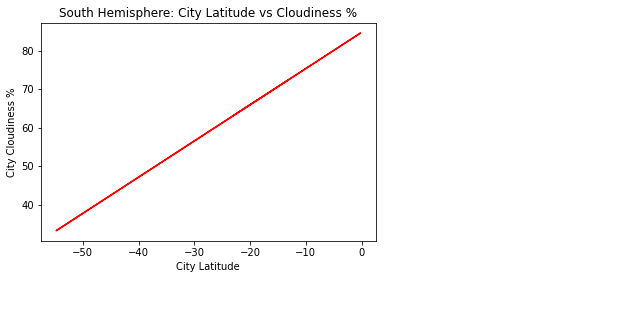

In [36]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness %')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The cloudiness changes by 1.03% for every latitude degree it is towards the equator

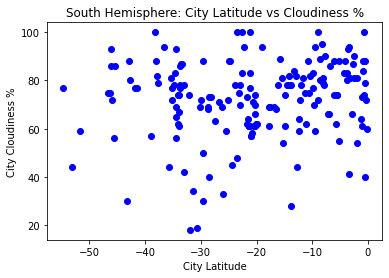

In [37]:
plt.scatter(southtemp["Latitude"], southtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness %")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [38]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.01x +3.04


LinregressResult(slope=0.01438685322892839, intercept=3.04304567152172, rvalue=0.09703012207878672, pvalue=0.053387190728316936, stderr=0.007425173314974965)

The r value is: 0.009414844590624255


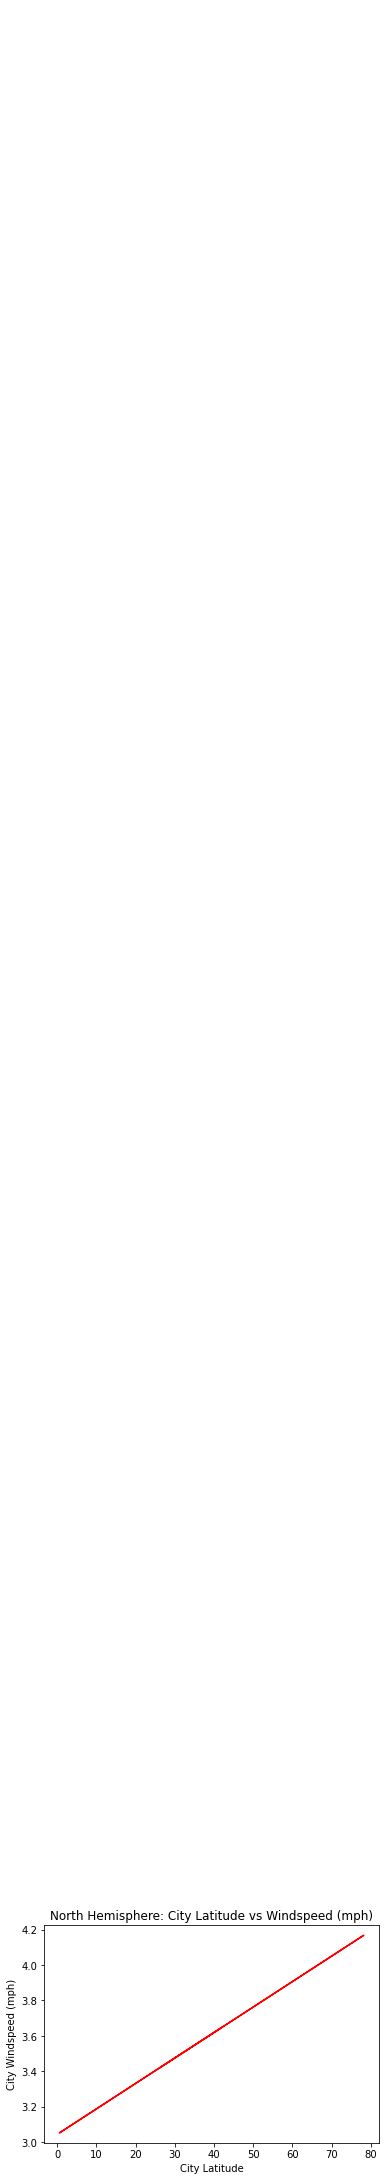

In [39]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel('City Latitude')
plt.ylabel('City Windspeed (mph)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The windspeed goes up by 0.01 mph per every latitude degree away from the equator in the Northern Hemisphere.

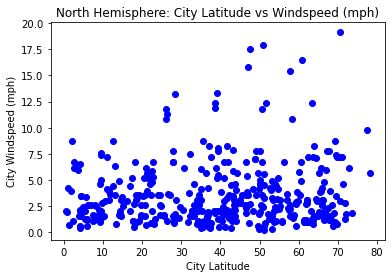

In [40]:
plt.scatter(northtemp["Latitude"], northtemp["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("City Windspeed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [41]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = -0.03x +3.18


LinregressResult(slope=-0.029922238049281145, intercept=3.1755057423005617, rvalue=-0.15078073151497143, pvalue=0.04514917295676615, stderr=0.014829804094859645)

The r value is: 0.022734828996189897


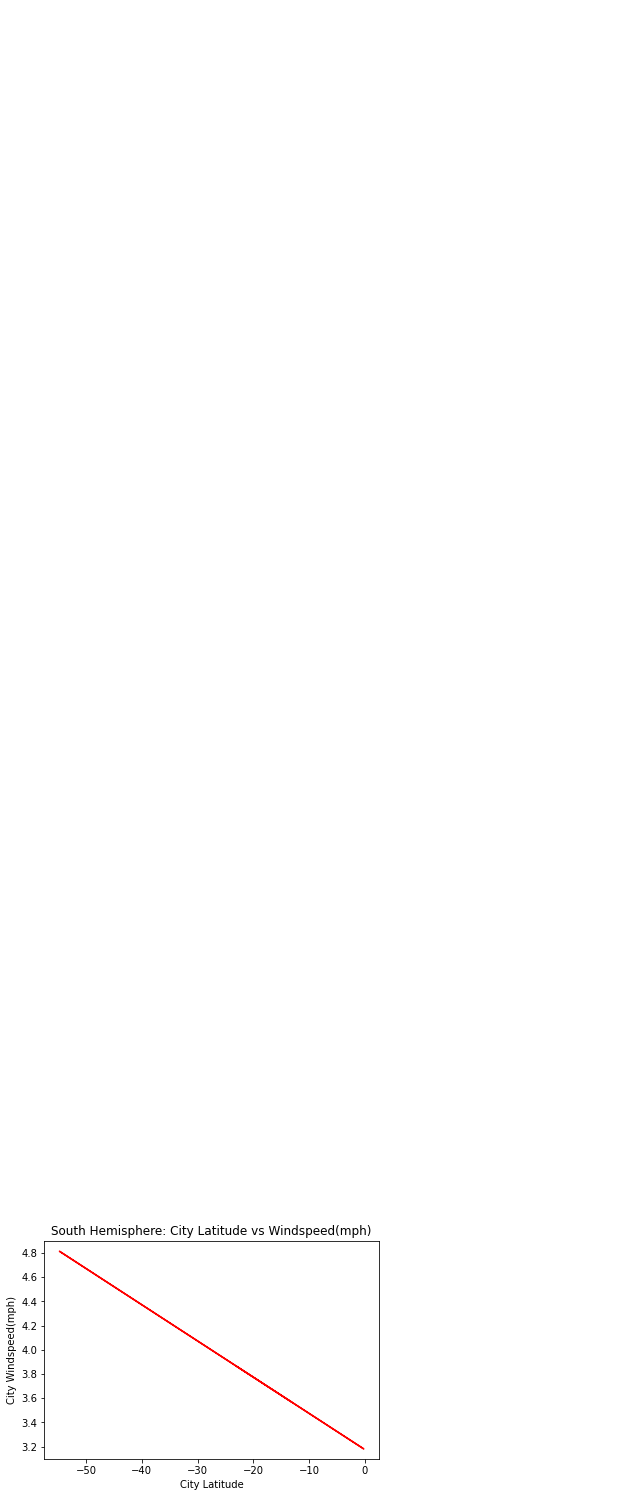

In [42]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Windspeed(mph)")
plt.xlabel('City Latitude')
plt.ylabel('City Windspeed(mph)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()
#Answer: The windspeed goes down by 0.03 mph per every latitude degree towards the equator in the Southern Hemisphere.

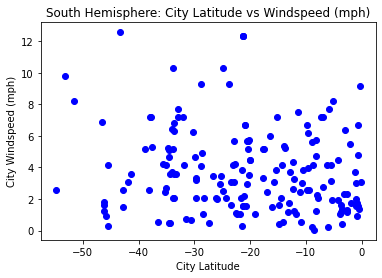

In [43]:
plt.scatter(southtemp["Latitude"], southtemp["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("City Windspeed (mph)")

plt.show()

In [44]:
weatherdf.to_csv('weatherAPI')